# **Titanic Survival Prediction — Exploratory Data Analysis (EDA)**

### Project Overview

The Titanic dataset contains demographic and travel information of passengers on the Titanic. Our goal is to understand the key factors that influenced passenger survival, using real-world data analysis skills like cleaning, visualizing, and interpreting data.

### Problem Statement

What characteristics (like age, gender, passenger class, etc.) influenced survival the most during the Titanic disaster?

### EDA Objectives

* Clean and preprocess the dataset
* Understand the distribution of individual features
* Explore relationships between features and survival
* Gain real, actionable insights with visualizations

### Import necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Set visual theme and color palette

In [2]:
sns.set_theme(style="whitegrid")
custom_palette = ["crimson", "teal", "orange", "purple", "violet"]
sns.set_palette(custom_palette)

### Load the Titanic dataset from uploaded file

In [3]:
df = pd.read_csv(r"dataset/train.csv")
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
print("Dataset Shape:", df.shape)
print("\nMissing Values:", df.isnull().sum())

Dataset Shape: (891, 12)

Missing Values: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


- **'Age'** column has **177 missing values**, which may affect age-based survival analysis. Needs imputation.
- **'Cabin'** is missing in **~77% of rows**, likely too incomplete to be useful. Best to drop this column.
- Only **2 passengers** have missing **'Embarked'** info, so we can easily fill this with the most common port.

### Display data types and missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Drop 'Cabin' due to high missing values

In [6]:
df.drop(columns=["Cabin"], inplace=True)

### Fill missing Age values with median

In [7]:
df["Age"] = df["Age"].fillna(df["Age"].median()) 

### Fill Embarked with mode

In [8]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

### Remove duplicates if any

In [9]:
df = df.drop_duplicates()

In [10]:
print("\n✅ After cleaning:\n",df.isnull().sum())
print("Final shape:", df.shape)


✅ After cleaning:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
Final shape: (891, 11)


## Univariate Analysis

### Survival Count

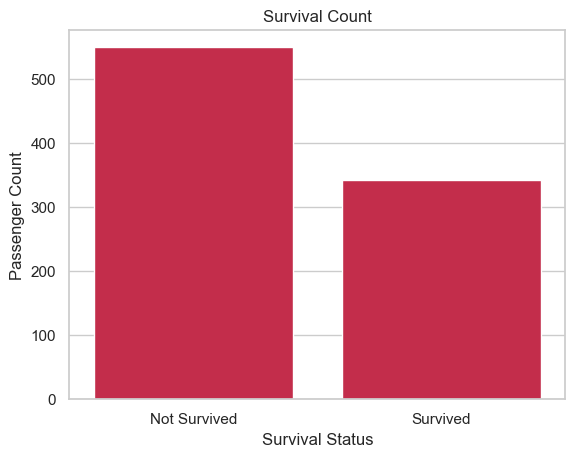

In [11]:
sns.countplot(x="Survived", data=df)
plt.title("Survival Count")
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.xlabel("Survival Status")
plt.ylabel("Passenger Count")
plt.show()

#### **Insights**

* More people died than survived — over 60% of passengers did not make it.
* Survivors are the minority group, indicating limited rescue capacity or poor emergency handling.
* The death toll was significantly higher, suggesting survival was influenced by certain strong factors
* The Titanic disaster had a low survival rate, which is important for further feature impact analysis.

### Gender Distribution

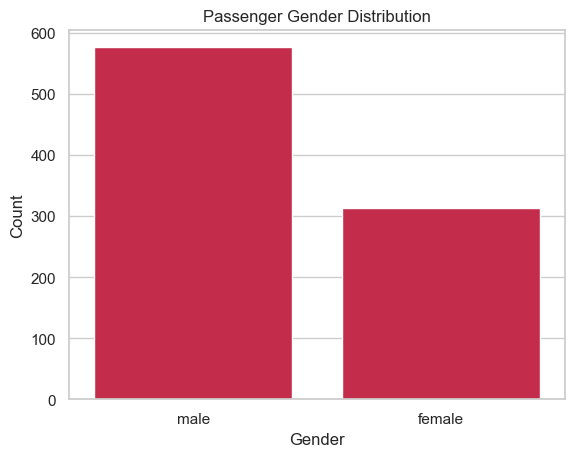

In [12]:
sns.countplot(x="Sex", data=df)
plt.title("Passenger Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

#### **Insights**

* Male passengers were nearly twice as many as female passengers on board.
* The Titanic had a male-dominated passenger list, which may reflect travel trends of that time.
* About 65% of the passengers were male, making gender an important factor in survival analysis.
* Despite fewer women, survival chances might still favor them due to the “women and children first” policy.
* This unbalanced gender ratio sets the stage for deeper analysis on survival rates by sex.

### Age Distribution

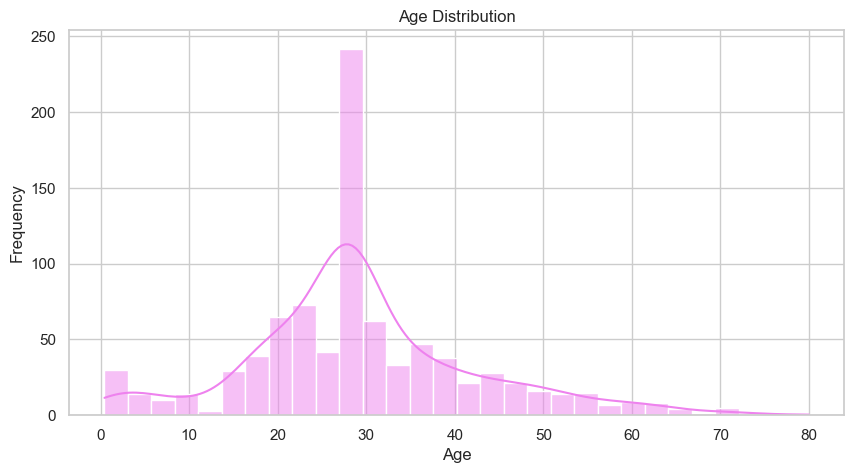

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Age"], bins=30, kde=True, color="violet")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

#### **Insights**

* Most passengers were in their 20s and early 30s, forming the peak age group on board.
* There’s a visible number of children and infants, showing families were also traveling.
* Very few passengers were above 60, suggesting elderly travel was uncommon.
* The presence of younger passengers could affect survival, especially under “women and children first.”
* The age range was diverse (0–80+), so age will be a key variable in survival analysis.

## Bivariate Analysis

### Survival by Gender

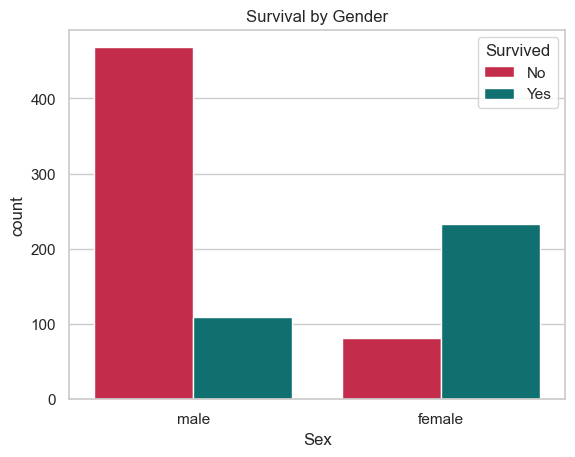

In [14]:
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival by Gender")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

#### **Insights**

*  Most women survived, showing strong priority in rescue efforts.
*  Most men did not survive, even though they were the majority onboard.
*  This plot confirms a clear gender bias in survival, likely due to “women and children first.”
*  Survival chances were much higher for females compared to males.

### Survival by Class

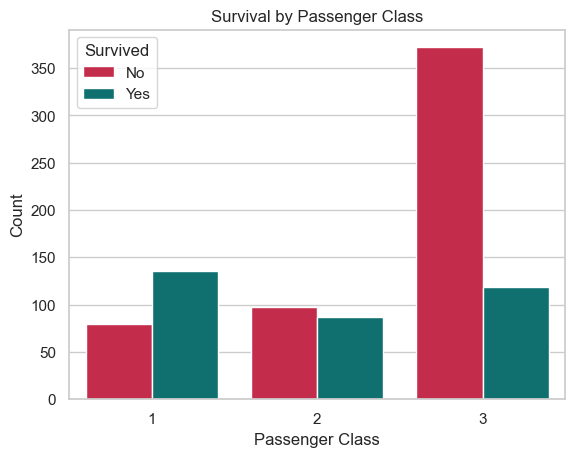

In [15]:
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

#### **Insights**

* 1st class passengers had the highest survival rate, likely due to better access to lifeboats.
* 3rd class had the most deaths, showing lower priority in evacuation.
* The survival gap between classes is clear — wealth was a major factor in survival chances.
* This highlights a major inequality — socioeconomic status influenced life or death on the Titanic.

### Age vs Survival

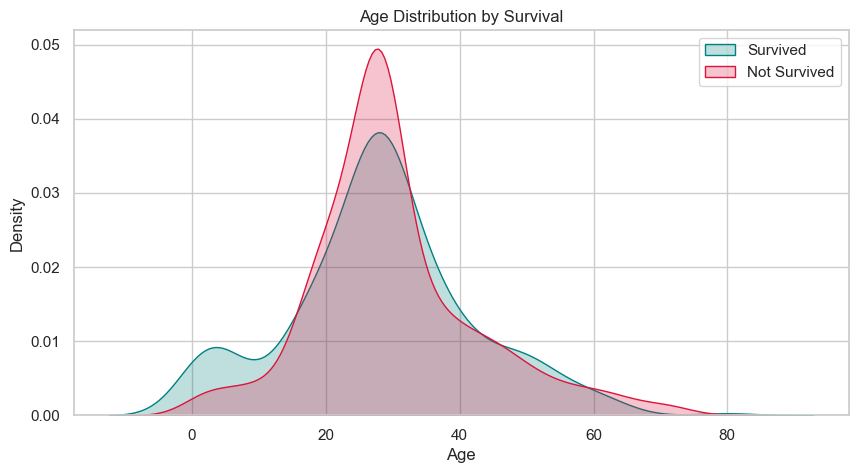

In [16]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df[df["Survived"] == 1]["Age"], label="Survived", fill=True, color="teal")
sns.kdeplot(data=df[df["Survived"] == 0]["Age"], label="Not Survived", fill=True, color="crimson")
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.legend()
plt.show()

#### **Insights**

* Children (ages 0–10) had higher survival density, supporting the “women and children first” policy.
* Most deaths occurred in the 20–40 age group, especially males, indicating lower priority during evacuation.
* Survivors are more evenly spread across ages, while non-survivors are concentrated around age 25–35.
* The survival rate declines slightly after age 50, suggesting older passengers had lower survival chances.

### Fare vs Survival

C:\Users\asus\AppData\Local\Temp\ipykernel_10988\1731021665.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Survived", y="Fare", data=df, palette="Set2")


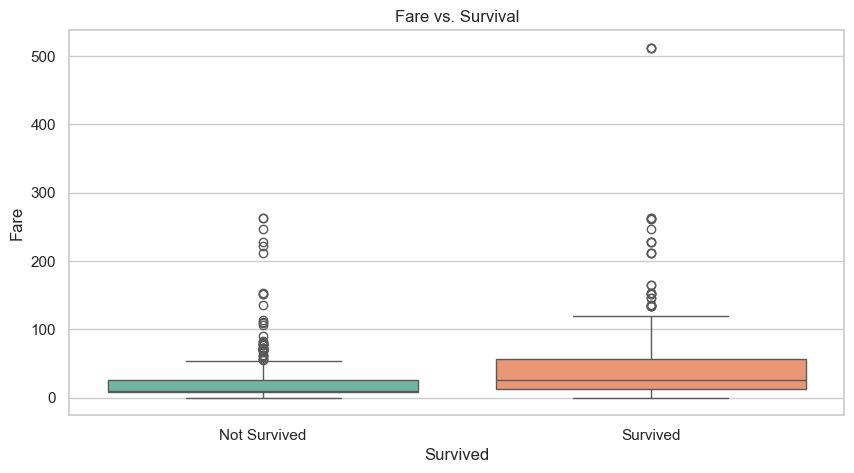

In [17]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Survived", y="Fare", data=df, palette="Set2")
plt.title("Fare vs. Survival")
plt.xticks([0, 1], ["Not Survived", "Survived"])
plt.show()

#### **Insights**

* Survivors paid higher fares on average than those who didn’t survive.
* The fare range for survivors is wider, showing that survival wasn’t limited to the richest but still favored them.
* Most non-survivors paid low fares, which hints they were likely from 3rd class cabins.
* Outliers in both groups indicate a few people paid exceptionally high fares, especially among survivors.

## Multivariate Analysis

### Survival by Class & Gender

C:\Users\asus\AppData\Local\Temp\ipykernel_10988\1500307354.py:1: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.catplot(x="Pclass", hue="Survived", col="Sex", data=df, kind="count", palette=custom_palette)


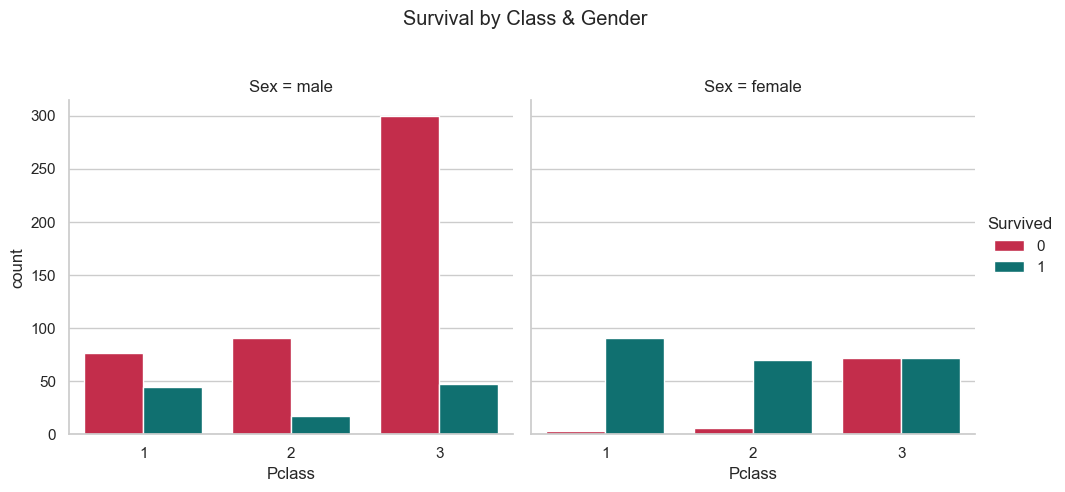

In [18]:
sns.catplot(x="Pclass", hue="Survived", col="Sex", data=df, kind="count", palette=custom_palette)
plt.subplots_adjust(top=0.8)
plt.suptitle("Survival by Class & Gender")
plt.show()

#### **Insights**

* Gender was a huge survival factor: Women, especially in Pclass 1 & 2, survived at much higher rates than men.
* Third-class males faced grim odds: The vast majority of Pclass 3 men did not survive.
* Class truly dictated survival: Lower class, particularly Pclass 3, consistently meant lower survival chances for both genders.

### Violin Plot: Age + Class + Survival

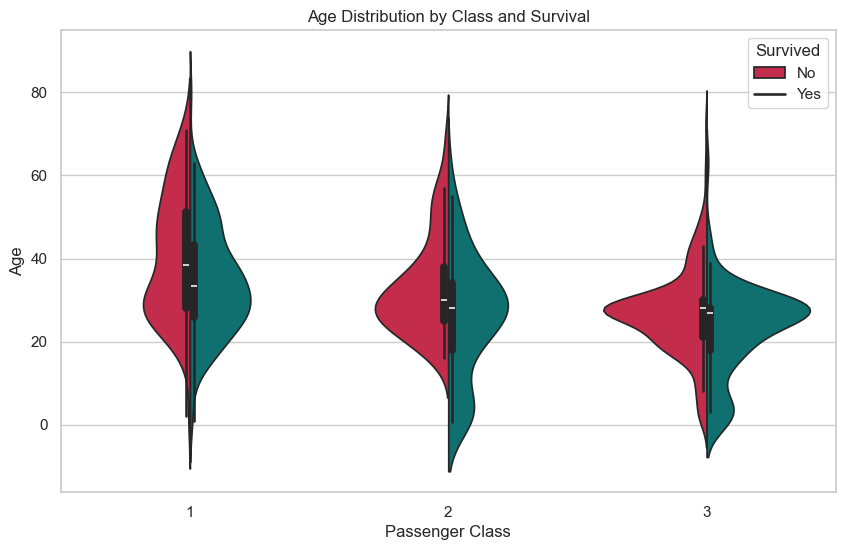

In [19]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df, split=True, palette=["crimson", "teal"])
plt.title("Age Distribution by Class and Survival")
plt.xlabel("Passenger Class")
plt.ylabel("Age")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

#### **Insights**

* Youth in Pclass 3 faced the highest mortality.
* Children in Pclass 1 & 2 had better survival odds.
* Older passengers generally had low survival across all classes.
* Pclass 1 survivors had the widest age range.

## Correlation Heatmap

### Encode Sex for numeric correlation

In [20]:
df_encoded = df.copy()
df_encoded["Sex"] = df_encoded["Sex"].map({"male": 0, "female": 1})

### Compute correlation matrix

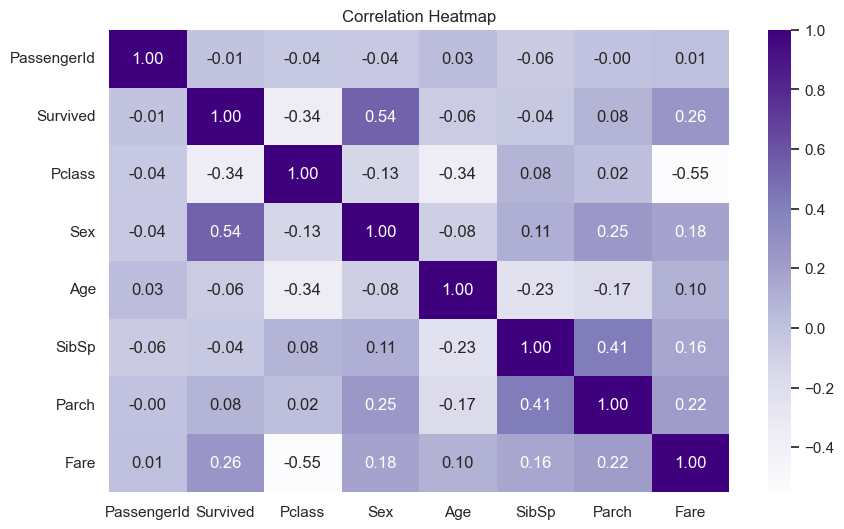

In [21]:
corr = df_encoded.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="Purples", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#### **Insights**

* Sex is the strongest positive predictor of survival.
* Passenger Class is the strongest negative predictor of survival.
* Fare shows a positive link with survival.
* Age has a very weak, slightly negative correlation with survival.

In [22]:
print("EDA Completed")

EDA Completed
